In [55]:
from keras.datasets import fashion_mnist

In [56]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [57]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

('Training data shape : ', (60000, 28, 28), (60000,))
('Testing data shape : ', (10000, 28, 28), (10000,))


In [58]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

('Total number of outputs : ', 10)
('Output classes : ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))


Text(0.5,1,u'Ground Truth : 9')

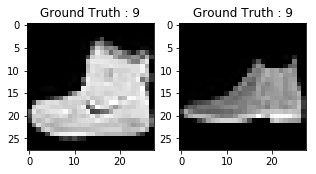

In [59]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [60]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [61]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [62]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


('Original label:', 9)
('After conversion to one-hot:', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))


In [63]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [64]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [65]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [66]:
batch_size = 64
epochs = 20
num_classes = 10

In [67]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [68]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [69]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [70]:
fashion_train
= fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 125s 3ms/step - loss: 0.6063 - acc: 0.7738 - val_loss: 0.3740 - val_acc: 0.8642
Epoch 2/20
48000/48000 [==============================] - 123s 3ms/step - loss: 0.3787 - acc: 0.8620 - val_loss: 0.3111 - val_acc: 0.8868
Epoch 3/20
48000/48000 [==============================] - 122s 3ms/step - loss: 0.3292 - acc: 0.8793 - val_loss: 0.2851 - val_acc: 0.8948
Epoch 4/20
48000/48000 [==============================] - 142s 3ms/step - loss: 0.3008 - acc: 0.8884 - val_loss: 0.2639 - val_acc: 0.9023
Epoch 5/20
48000/48000 [==============================] - 151s 3ms/step - loss: 0.2831 - acc: 0.8944 - val_loss: 0.2500 - val_acc: 0.9074
Epoch 6/20
48000/48000 [==============================] - 132s 3ms/step - loss: 0.2697 - acc: 0.8990 - val_loss: 0.2374 - val_acc: 0.9122
Epoch 7/20
48000/48000 [==============================] - 120s 3ms/step - loss: 0.2570 - acc: 0.9031 - val_loss: 0.2399 - 

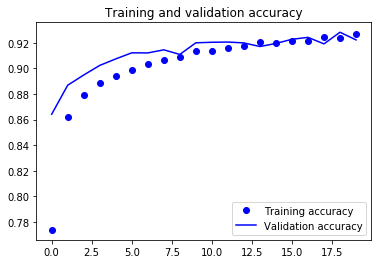

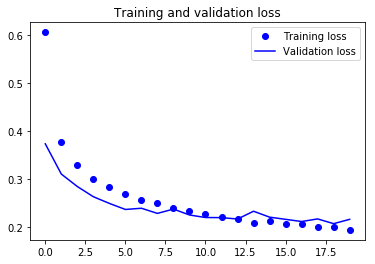

In [71]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [72]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [73]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

('Test loss:', 0.2261139954417944)
('Test accuracy:', 0.9186)


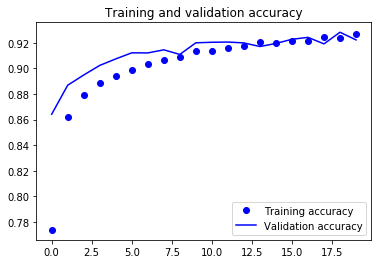

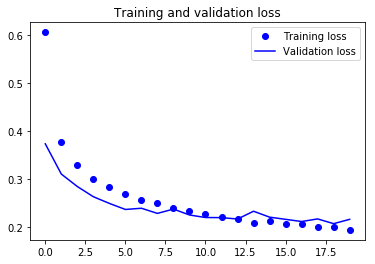

In [74]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [75]:
predicted_classes = fashion_model.predict(test_X)

In [76]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [77]:
predicted_classes.shape, test_Y.shape


((10000,), (10000,))

Found 9153 correct labels


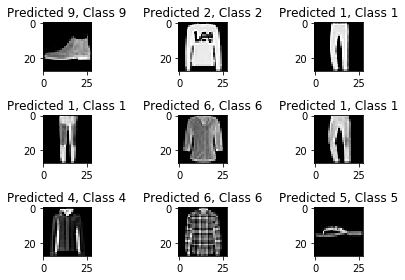

In [78]:
correct = np.where(predicted_classes==test_Y)[0]
print "Found %d correct labels" % len(correct)
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 847 incorrect labels


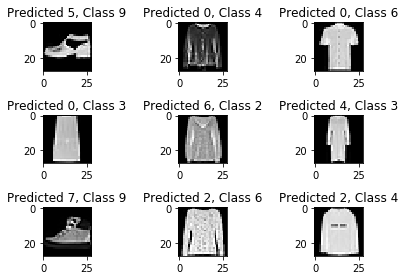

In [79]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print "Found %d incorrect labels" % len(incorrect)
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [80]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))


             precision    recall  f1-score   support

    Class 0       0.78      0.91      0.84      1000
    Class 1       1.00      0.98      0.99      1000
    Class 2       0.84      0.91      0.87      1000
    Class 3       0.89      0.95      0.92      1000
    Class 4       0.89      0.83      0.86      1000
    Class 5       0.99      0.98      0.98      1000
    Class 6       0.86      0.67      0.76      1000
    Class 7       0.94      0.98      0.96      1000
    Class 8       0.99      0.98      0.99      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.92      0.92      0.91     10000



In [81]:
from keras.callbacks import ModelCheckpoint

In [82]:
fashion_model_json = fashion_model.to_json()

In [83]:
with open("iop_model.json", "w") as json_file:
    json_file.write(fashion_model_json)

In [84]:
fashion_model.save_weights("iop_model.h5")

In [85]:
from keras.models import model_from_json

In [86]:
#Model
json_file  =  open('iop_model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#Weights
loaded_model.load_weights("iop_model.h5")
print("loaded model")

loaded model


In [87]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
score = loaded_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

10000/10000 [==============================] - 8s 782us/step
acc: 91.86%


In [88]:
path = '/home/sagar/Downloads/iop_test4.jpg'

import cv2
img = cv2.imread(path,0)

In [89]:
print(img.shape)
img = cv2.resize(img, (28,28)) 
print(img.shape)
# img = img.reshape(-1,28,28,1)
print(img.shape)
img.astype('float32')
img = img/255.

(160, 240)
(28, 28)
(28, 28)


In [93]:
predicted_class = loaded_model.predict(img[None,:,:,None])
# predicted_class = np.argmax(np.round(predicted_class))

In [94]:
predicted_class

array([[1.2248181e-04, 3.9855266e-10, 9.0885131e-08, 1.7619895e-08,
        1.8129917e-10, 6.4584014e-09, 1.3199133e-08, 2.0850498e-10,
        9.9987733e-01, 2.1412724e-10]], dtype=float32)

In [95]:
predicted_class = np.argmax(np.round(predicted_class))
predicted_class

8